In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import seaborn as sns
import skbio
from qiime2 import Artifact

In [2]:
metadata = pd.read_csv('../input_data/metadata.txt', sep='\t', index_col=0)
metadata

,Location,Type
Sample Id,,
ENVGutDigesta1,Digesta,ENV
ENVGutDigesta2,Digesta,ENV
ENVGutDigesta3,Digesta,ENV
ENVGutTissue1,Tissue,ENV
ENVGutTissue2,Tissue,ENV
ENVGutTissue3,Tissue,ENV
LabGutDigesta1,Digesta,LAB
LabGutDigesta2,Digesta,LAB
LabGutDigesta3,Digesta,LAB


In [3]:
pcoa_results = Artifact.load('../input_data/pcoa/bray_curtis_pcoa_results.qza')
pcoa_results = pcoa_results.view(skbio.OrdinationResults)
pcoa_pc = pcoa_results.samples.iloc[:,:3]
pcoa_pc.columns = ['PC1', 'PC2', 'PC3']
pcoa_pc = pd.concat([pcoa_pc,metadata], axis=1)
pcoa_pc['Sample type'] = pcoa_pc['Type'] + '-' + pcoa_pc['Location']
pcoa_pc

,PC1,PC2,PC3,Location,Type,Sample type
Sample Id,,,,,,
ENVGutDigesta1,0.356647,-0.515316,0.011333,Digesta,ENV,ENV-Digesta
ENVGutDigesta2,0.252158,-0.400547,0.037493,Digesta,ENV,ENV-Digesta
ENVGutDigesta3,0.377725,-0.528326,-0.044709,Digesta,ENV,ENV-Digesta
ENVGutTissue1,-0.410961,0.037381,-0.000487,Tissue,ENV,ENV-Tissue
ENVGutTissue2,-0.413563,0.040503,0.000120,Tissue,ENV,ENV-Tissue
ENVGutTissue3,-0.414015,0.040091,-0.000320,Tissue,ENV,ENV-Tissue
LabGutDigesta1,0.492577,0.399964,-0.174130,Digesta,LAB,LAB-Digesta
LabGutDigesta2,0.489028,0.385477,0.232777,Digesta,LAB,LAB-Digesta
LabGutDigesta3,0.498927,0.406141,-0.055442,Digesta,LAB,LAB-Digesta


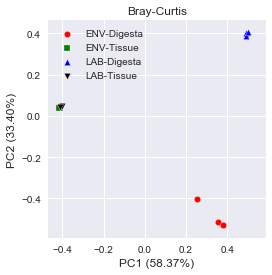

In [4]:
plt.style.use('seaborn')


type2color = dict(zip(pcoa_pc['Sample type'].unique(),'rgbk'))
type2shape = dict(zip(pcoa_pc['Sample type'].unique(),'os^v'))

fig, ax = plt.subplots(figsize=(5.6,4))

for t in pcoa_pc['Sample type'].unique():
    filt = pcoa_pc['Sample type']==t
    x = pcoa_pc.loc[filt,'PC1']
    y = pcoa_pc.loc[filt,'PC2']
    ax.scatter(x=x,
               y=y,
               edgecolors='w',
               s=40,
               c=type2color[t],
               marker=type2shape[t],
               label=t)

# ax.spines['top'].set_visible(False)  
# ax.spines['right'].set_visible(False)    


plt.title('Bray-Curtis', fontsize=12)
plt.xlabel('PC1 ({:0.2f}%)'.format(pcoa_results.proportion_explained[0]*100), fontsize=12)
plt.ylabel('PC2 ({:0.2f}%)'.format(pcoa_results.proportion_explained[1]*100), fontsize=12)
plt.legend()
plt.axis('square')


# # zoom in
# zoom=12
# axins = zoomed_inset_axes(ax, zoom, loc='center') 
# mark_inset(ax, axins, loc1=2, loc2=3, fc='none', ec='0.5')

# for t in pcoa_pc['Sample type'].unique():
#     if 'Tissue' in t:
#         filt = pcoa_pc['Sample type']==t
#         x = pcoa_pc.loc[filt,'PC1']
#         y = pcoa_pc.loc[filt,'PC2']
#         axins.scatter(x=x,
#                       y=y,
#                       edgecolors='w',
#                       s=50,
#                       c=type2color[t],
#                       marker=type2shape[t],
#                       label=t)

# # # sub region of the original image
# x1, x2, y1, y2 = -0.421, -0.399, 0.032, 0.055
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)


plt.savefig('../figures/bray-curtis.png', dpi=600)
plt.show()